In [1]:
from bandexcitation.File.DataWriter import DataConverter
from bandexcitation.Measurement.BEMeasurement import BEMeasurement
from bandexcitation.File.DataWriter import DataConverter

import matplotlib.pyplot as plt

import numpy as np

In [2]:
beparms = BEMeasurement(spectroscopic_min_voltage=-4, 
                   spectroscopic_max_voltage=4, 
                   BE_rep=4, 
                   BE_time = 1e-3,
                   BE_ampl = 2,
                   AI_sample_rate=1e6, 
                   BE_ppw = 2**15//4,
                   BE_center_freq = 340e3, 
                   BE_bandwidth = 60e3, 
                   BE_num_bins = 200,
                   AI_photodiode_vertical_range=1,
                   AI_AWG_channel_num=1
                  )

Initializing BEparams
0


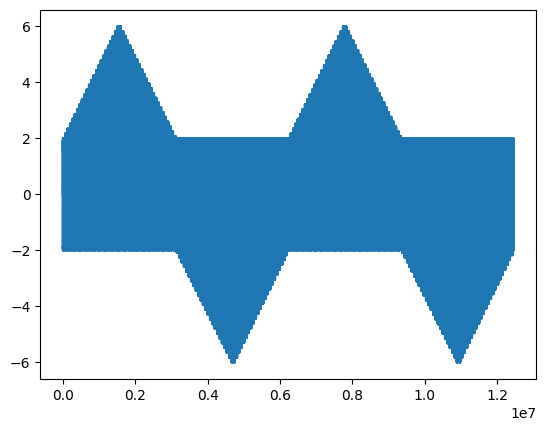

In [3]:
plt.plot(beparms.be_spectroscopy.cantilever_excitation_waveform)

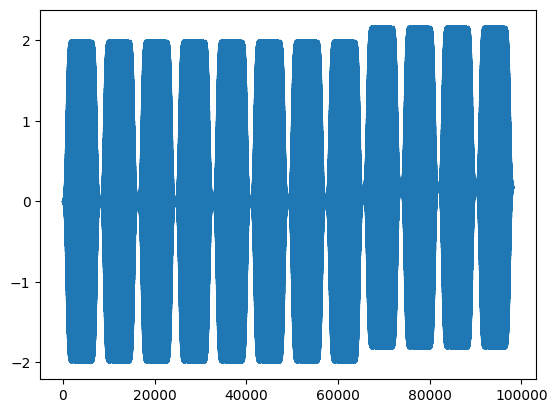

In [4]:
plt.plot(beparms.be_spectroscopy.cantilever_excitation_waveform[0:beparms.BE_ppw*beparms.BE_rep*3])

In [5]:
wave = beparms.get_simulated_BE_measurement()

dc = DataConverter(wave)

BE_FFT = DataConverter.BE_FFT(wave)
freqs = DataConverter.BE_frequencies(len(wave), beparms.AI_sample_rate)
inds = DataConverter.extract_freq_range(freqs, (beparms.BE_center_freq-beparms.BE_bandwidth/2, beparms.BE_center_freq+beparms.BE_bandwidth/2), beparms.BE_num_bins)



(310000.0, 370000.0)


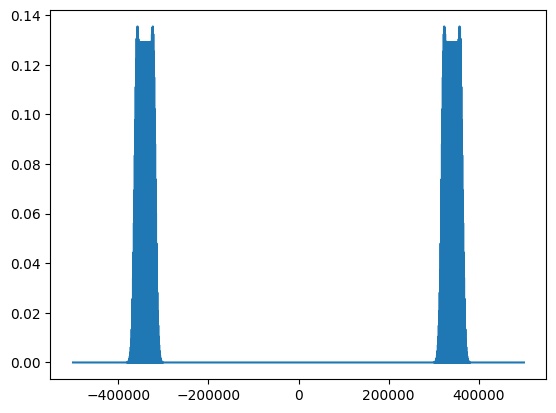

In [6]:
plt.plot(freqs, np.abs(BE_FFT))
# plt.xlim(310000,370000)

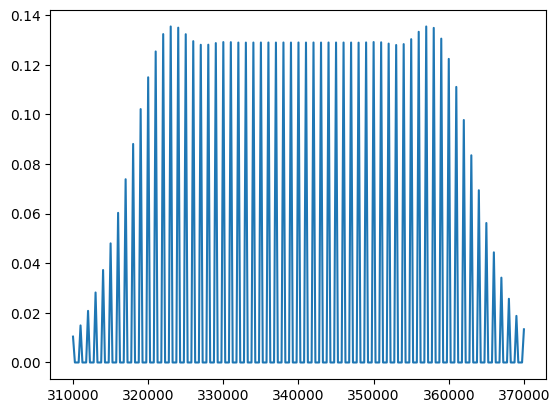

In [7]:
plt.plot(freqs[inds], np.abs(BE_FFT[inds]))

In [5]:
measurement = beparms.PXI.run()

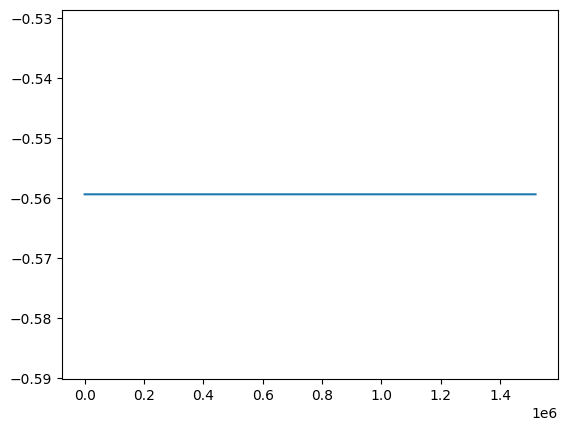

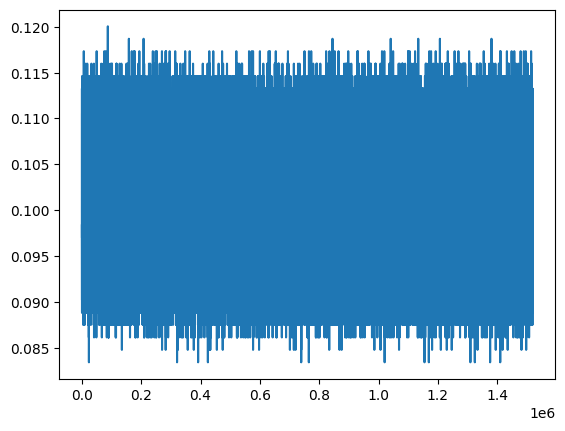

In [6]:

plt.plot(np.array(measurement[0].samples))
plt.figure()
plt.plot(np.array(measurement[1].samples))


TypeError: float() argument must be a string or a real number, not 'WaveformInfo'

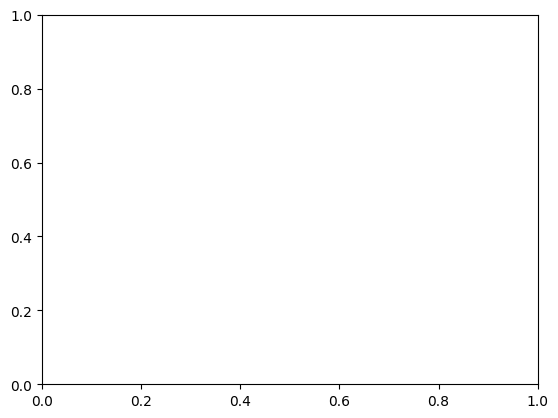

In [11]:
plt.plot(measurement[0:beparms.AI_BE_ppw*beparms.BE_rep])

In [12]:
measured_wave = measurement[0:beparms.AI_BE_ppw*beparms.BE_rep]

dc = DataConverter(measured_wave)

BE_FFT = DataConverter.BE_FFT(measured_wave)
freqs = DataConverter.BE_frequencies(len(measured_wave), beparms.AI_sample_rate)
inds = DataConverter.extract_freq_range(freqs, (beparms.BE_center_freq-beparms.BE_bandwidth/2, beparms.BE_center_freq+beparms.BE_bandwidth/2), beparms.BE_num_bins)

TypeError: must be real number, not WaveformInfo

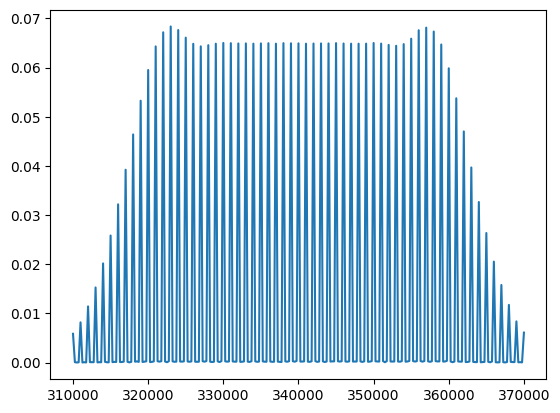

In [ ]:
plt.plot(freqs[inds], np.abs(BE_FFT[inds]))